In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import missingno as msno
import seaborn as sns
import warnings
import math
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import (cross_val_score, train_test_split, )

from sklearn.preprocessing import StandardScaler

import warnings

import torch
import torch.nn as nn

In [2]:
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv('../mydata/train.csv')
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


In [ ]:
df.dtypes

MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
SD1                  float64
SD2                  float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
SDRR_RMSSD_REL_RR    float64
KURT_REL_RR          float64
SKEW_REL_RR          float64
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
sampen               float64
higuci               float64
datasetId     

In [9]:
df = df[['MEAN_RR', 'RMSSD', 'pNN25', 'pNN50', 'LF', 'HF', 'LF_HF', 'condition']]

In [15]:
df = df.rename(columns={'MEAN_RR':'mean_pr',
                        'RMSSD':'rmssd',
                        'pNN25':'pnn25',
                        'pNN50':'pnn50',
                        'LF':'lf',
                        'HF':'hf',
                        'LF_HF':'lf_hf',
                        })

In [ ]:
df

,mean_pr,rmssd,pnn25,pnn50,lf,hf,lf_hf,condition
0,885.157845,15.554505,11.133333,0.533333,1009.249419,15.522602,65.018055,0
1,939.425371,12.964439,5.600000,0.000000,690.113275,2.108525,327.296635,1
2,898.186047,16.305279,13.066667,0.200000,1298.222619,13.769729,94.280910,1
3,881.757864,15.720468,11.800000,0.133333,1005.981659,18.181913,55.328701,0
4,809.625331,19.213819,20.200000,0.200000,1421.782051,48.215822,29.487873,0
...,...,...,...,...,...,...,...,...
369284,721.396910,9.609941,0.933333,0.000000,313.115283,38.227175,8.190908,0
369285,984.266492,13.762274,6.333333,0.200000,717.285030,2.573834,278.683532,0
369286,1025.499743,23.051254,30.400000,2.066667,2376.578392,4.287216,554.340761,0
369287,798.123167,16.736686,10.000000,1.466667,1277.128490,46.636158,27.384942,0


In [17]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

<Axes: >

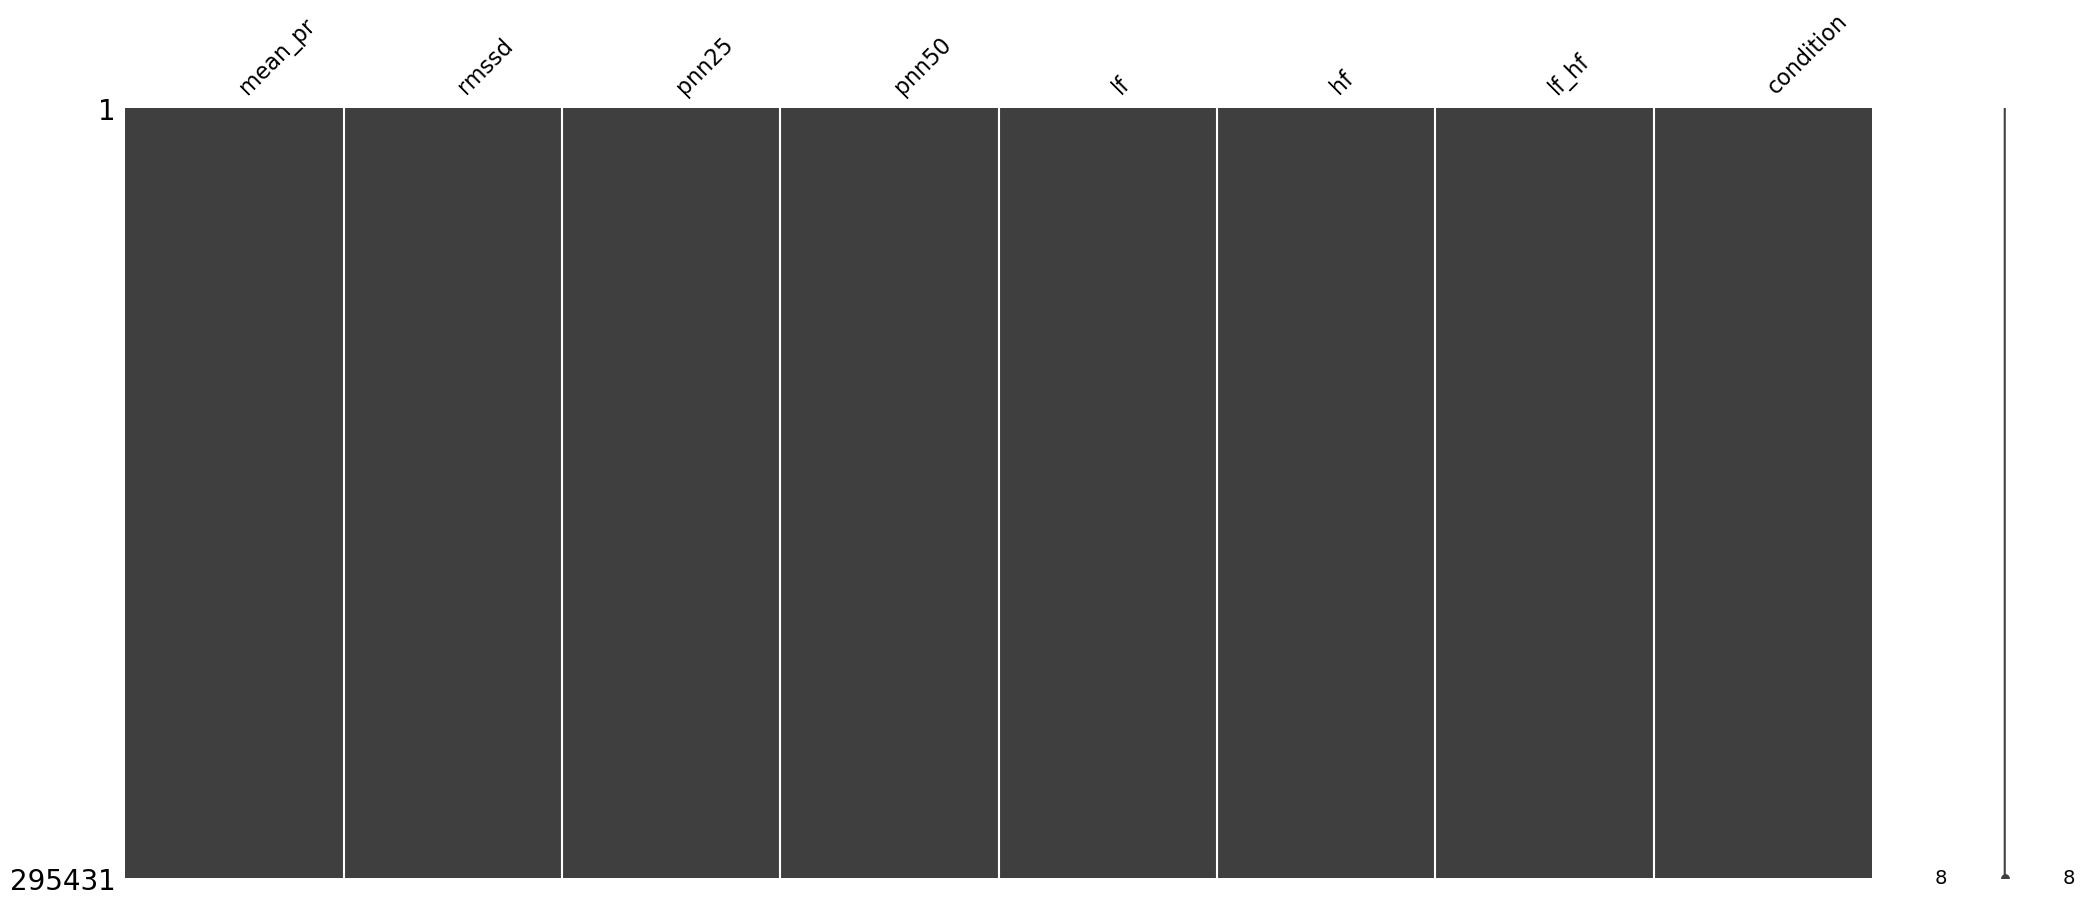

In [19]:
msno.matrix(train_set)

In [ ]:
train_set.info()
train_set.dtypes

<class 'pandas.core.frame.DataFrame'>
Index: 295431 entries, 78225 to 121958
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   MEAN_RR    295431 non-null  float64
 1   RMSSD      295431 non-null  float64
 2   pNN25      295431 non-null  float64
 3   pNN50      295431 non-null  float64
 4   LF         295431 non-null  float64
 5   HF         295431 non-null  float64
 6   LF_HF      295431 non-null  float64
 7   condition  295431 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 20.3 MB


MEAN_RR      float64
RMSSD        float64
pNN25        float64
pNN50        float64
LF           float64
HF           float64
LF_HF        float64
condition      int64
dtype: object

In [ ]:
train_set.mean()
# train_set.median()
# train_set.mode()

In [ ]:
train_set.std()
# train_set.var()

In [ ]:
# sns.pairplot(train_set, diag_kind='kde', height=2.5)
# plt.suptitle('Pairplot of all features', y=1.02, fontsize=16, fontweight='bold')
# plt.show()

In [ ]:
target_column = ['condition']

train_set_features = train_set.drop(columns=target_column)
test_set_features = test_set.drop(columns=target_column)

scaler = StandardScaler()
train_set_transformed = scaler.fit_transform(train_set_features)
test_set_transformed = scaler.transform(test_set_features)

train_set_transformed = pd.DataFrame(train_set_transformed, columns=train_set_features.columns, index=train_set.index)
test_set_transformed = pd.DataFrame(test_set_transformed, columns=test_set_features.columns, index=test_set.index)


last_column_train = train_set[target_column].reset_index(drop=True)
last_column_test = test_set[target_column].reset_index(drop=True)

trans_train_set = pd.concat([train_set_transformed.reset_index(drop=True), last_column_train], axis=1)
trans_test_set = pd.concat([test_set_transformed.reset_index(drop=True), last_column_test], axis=1)

In [23]:
import joblib
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [ ]:
power_trans_train_set = trans_train_set.copy()
power_trans_test_set = trans_test_set.copy()

cols_to_transform = ['mean_pr', 'rmssd', 'pnn25', 'pnn50', 'lf', 'hf', 'lf_hf']

pt = PowerTransformer(method='yeo-johnson')

power_trans_train_set[cols_to_transform] = pt.fit_transform(trans_train_set[cols_to_transform])
power_trans_test_set[cols_to_transform] = pt.transform(trans_test_set[cols_to_transform])

power_trans_test_set

,mean_pr,rmssd,pnn25,pnn50,lf,hf,lf_hf,condition
0,0.066279,0.083393,0.115379,-0.829995,0.525873,-0.865351,0.945777,1
1,0.981991,1.377372,1.536546,0.749892,1.163718,-0.660277,1.084296,1
2,-0.989043,1.527689,1.665596,0.563673,1.905814,1.589725,-0.576960,1
3,-0.697816,0.473534,0.168498,1.327113,1.080493,1.067599,-0.546622,0
4,-0.294365,-0.769253,-0.921052,-1.140884,-0.500957,-0.531626,-0.129110,1
...,...,...,...,...,...,...,...,...
73853,1.172871,1.543834,1.609432,1.121204,1.566401,-1.124234,1.901287,1
73854,-0.834243,1.742264,1.803618,1.357349,1.924351,1.630753,-0.601754,1
73855,0.159210,0.955528,0.742041,1.568377,0.509135,1.369510,-0.875623,0
73856,2.869774,-0.518549,-0.825690,0.563673,-2.443108,-1.368641,-0.376952,0


In [26]:
joblib.dump(pt, 'yeo_johnson_transformer.pkl')

['yeo_johnson_transformer.pkl']

In [29]:
cont_cols = ['mean_pr', 'rmssd', 'pnn25', 'pnn50', 'lf', 'hf', 'lf_hf']
y_col = ['condition']

In [31]:
y_train = torch.tensor(power_trans_train_set[y_col].values).flatten()
y_test = torch.tensor(power_trans_test_set[y_col].values).flatten()
y_train.shape

torch.Size([295431])

In [33]:
conts_train = np.stack([power_trans_train_set[col].values for col in cont_cols], 1)
conts_train = torch.tensor(conts_train, dtype=torch.float)
conts_train[:5]

tensor([[-0.0457,  1.3459,  1.6094, -0.1675,  1.2256,  0.1586,  0.2149],
        [ 0.7416, -0.1409, -0.1024,  0.6916, -0.6121,  0.1469, -0.6344],
        [-0.4618,  0.5340,  0.5634,  0.4171,  0.8538,  0.1534, -0.0206],
        [-1.1735, -1.5115, -1.6379, -1.1409, -1.7246,  0.6378, -1.0623],
        [ 1.0742,  1.4411,  1.3362,  1.7190,  1.2447, -1.2076,  1.8897]])

In [35]:
conts_test = np.stack([power_trans_test_set[col].values for col in cont_cols], 1)
conts_test = torch.tensor(conts_test, dtype=torch.float)
conts_test[:5]

tensor([[ 0.0663,  0.0834,  0.1154, -0.8300,  0.5259, -0.8654,  0.9458],
        [ 0.9820,  1.3774,  1.5365,  0.7499,  1.1637, -0.6603,  1.0843],
        [-0.9890,  1.5277,  1.6656,  0.5637,  1.9058,  1.5897, -0.5770],
        [-0.6978,  0.4735,  0.1685,  1.3271,  1.0805,  1.0676, -0.5466],
        [-0.2944, -0.7693, -0.9211, -1.1409, -0.5010, -0.5316, -0.1291]])

In [37]:
class TabularModel(nn.Module):

    def __init__(self, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_in = n_cont  

        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))

        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cont):
        x_cont = self.bn_cont(x_cont)
        x = self.layers(x_cont)
        return x

In [39]:
torch.manual_seed(33)
model = TabularModel(conts_train.shape[1], 3, [200,100,50,20,10], p=0.4)

In [41]:
model

TabularModel(
  (bn_cont): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=7, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=20, bias=True)
    (13): ReLU(inplace=True)
    (14): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.4, inplace=Fa

In [43]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [44]:
y_train

tensor([0, 0, 0,  ..., 1, 2, 0])

In [45]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(conts_train)
    loss = criterion(y_pred, y_train)
    # losses.append(loss)
    losses.append(loss.detach().item()) 

    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 1.23351264
epoch:  26  loss: 1.02359927
epoch:  51  loss: 0.91987014
epoch:  76  loss: 0.81839603
epoch: 101  loss: 0.72626424
epoch: 126  loss: 0.65404236
epoch: 151  loss: 0.59276992
epoch: 176  loss: 0.54250419
epoch: 201  loss: 0.49656218
epoch: 226  loss: 0.45436540
epoch: 251  loss: 0.41850060
epoch: 276  loss: 0.38606417
epoch: 300  loss: 0.35908398

Duration: 588 seconds


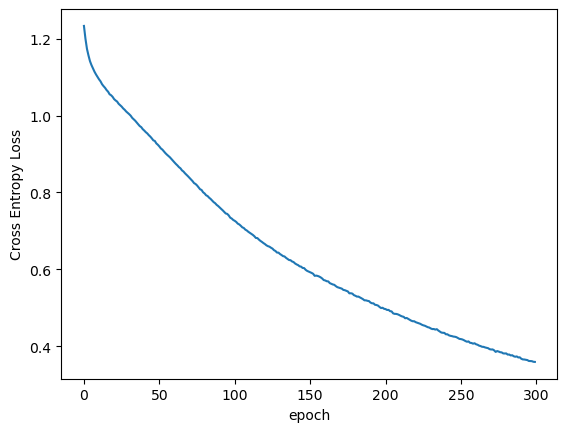

In [48]:
plt.plot(range(epochs), losses)
plt.ylabel('Cross Entropy Loss')
plt.xlabel('epoch');

In [49]:
with torch.no_grad():
    y_val = model(conts_test)
    loss = criterion(y_val, y_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.35793981


In [50]:
rows = 50
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test[i]:^7}')
    if y_val[i].argmax().item() == y_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([-0.6974,  2.1646, -1.2574])    1      1   
tensor([-2.4190,  0.2572,  0.5263])    2      1   
tensor([ 0.4362,  1.1523, -0.5199])    1      1   
tensor([ 1.8324, -0.8076, -0.4239])    0      0   
tensor([-2.2243,  1.8652, -0.9763])    1      1   
tensor([ 2.4169, -1.4109, -1.1543])    0      0   
tensor([ 1.5412, -0.8163,  0.5721])    0      0   
tensor([ 0.0844,  0.0933, -0.1029])    1      1   
tensor([ 1.7372, -0.7234, -0.3417])    0      0   
tensor([-1.6704, -1.3644,  4.5461])    2      2   
tensor([ 4.1101, -0.7096, -0.9320])    0      0   
tensor([ 0.2658, -0.2641, -0.6576])    0      1   
tensor([-0.6149,  2.3993, -1.6194])    1      2   
tensor([ 1.7639, -1.1776, -0.0257])    0      0   
tensor([-5.4364,  3.1154, -2.1988])    1      1   
tensor([ 4.9379, -2.8390, -1.8236])    0      0   
tensor([ 0.1470,  1.6842, -1.8038])    1      0   
tensor([-1.0354,  0.5680, -1.1567])    1      1   
tensor([-1.6545, -0.1929,  1.1935])    2

In [57]:
if len(losses) == epochs:
    torch.save(model.state_dict(), 'ppg_regression.pt')
else:
    print('Model has not been trained. Consider loading a trained model instead.')

In [73]:
model2 = TabularModel(conts_train.shape[1], 3, [200,100,50,20,10], p=0.4)

In [75]:
model2.load_state_dict(torch.load('ppg_regression.pt'));
model2.eval()

TabularModel(
  (bn_cont): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=7, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=20, bias=True)
    (13): ReLU(inplace=True)
    (14): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.4, inplace=Fa

In [79]:
cont_cols = ['mean_pr', 'rmssd', 'pnn25', 'pnn50', 'lf', 'hf', 'lf_hf']
y_col = ['condition']

y_test_test = torch.tensor(power_trans_test[y_col].values).flatten()
y_test_test.shape

conts_test_test = np.stack([power_trans_test[col].values for col in cont_cols], 1)
conts_test_test = torch.tensor(conts_test_test, dtype=torch.float)
conts_test_test[:5]

tensor([[-1.0668, -0.5918, -0.5399, -1.1409, -0.5121,  1.1265, -0.9691],
        [ 0.1046,  1.0534,  1.3404, -0.6845,  1.1901,  0.0412,  0.2971],
        [ 0.9419,  1.4466,  1.5222,  1.1589,  1.6330, -0.5138,  1.2413],
        [-0.0557, -0.7622, -0.5834, -0.0544, -0.8630, -0.4222, -0.3969],
        [-0.7029, -0.3139, -0.3317,  0.1529, -0.8020,  0.3980, -0.7924]])

In [81]:
with torch.no_grad():
    z = model2(conts_test_test)
print(f'\nThe predicted fare class is {z}')


The predicted fare class is tensor([[ 3.2719, -2.3729, -1.2005],
        [-2.0097, -0.8755,  3.8429],
        [ 2.4105, -1.2320, -0.8064],
        ...,
        [ 3.1931, -2.2940, -1.1356],
        [ 2.5361, -1.4898, -0.7865],
        [-1.1215, -0.5847,  2.3496]])


In [95]:
with torch.no_grad():
    y_val = model2(conts_test_test)
    loss = criterion(y_val, y_test_test)
print(f'CE Loss: {loss:.8f}')

CE Loss: 0.14719060


In [91]:
rows = 500
correct = 0
print(f'{"MODEL OUTPUT":26} ARGMAX  Y_TEST')
for i in range(rows):
    print(f'{str(y_val[i]):26} {y_val[i].argmax():^7}{y_test_test[i]:^7}')
    if y_val[i].argmax().item() == y_test_test[i]:
        correct += 1
print(f'\n{correct} out of {rows} = {100*correct/rows:.2f}% correct')

MODEL OUTPUT               ARGMAX  Y_TEST
tensor([ 2.9863, -2.5012, -1.6160])    0      0   
tensor([-4.4367, -0.5558,  4.7299])    2      2   
tensor([ 2.9376, -2.7844, -1.3715])    0      0   
tensor([ 3.4213, -1.5626, -0.7596])    0      0   
tensor([ 2.2701, -1.5599, -0.2984])    0      1   
tensor([-0.3674,  0.1624,  0.8467])    2      2   
tensor([-3.8588,  3.3555, -0.0328])    1      1   
tensor([ 3.6842, -2.2576, -1.3684])    0      0   
tensor([-3.6135,  1.5237, -2.1473])    1      1   
tensor([ 2.5992, -1.2959, -0.5231])    0      0   
tensor([ 2.5255, -0.6258, -1.2678])    0      0   
tensor([-2.2688,  2.7583, -1.9494])    1      1   
tensor([ 1.0109, -1.5996, -1.0850])    0      0   
tensor([ 2.2443, -1.4579, -0.1518])    0      0   
tensor([ 1.4520, -2.8439, -1.5585])    0      0   
tensor([ 1.3186, -0.9290, -0.6743])    0      0   
tensor([-4.4623,  2.3861, -1.4888])    1      1   
tensor([ 0.1640,  1.3500, -0.5729])    1      1   
tensor([-2.4604,  1.6838, -1.8879])    1